# csv 파일 로드.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('vgames2.csv', index_col = 0)
#df.drop('Unnamed: 0', axis=1,inplace=True) 
df


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 데이터 정제 (EDA)


year error cnt = 371
pop cnt = 16598
0.02


array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

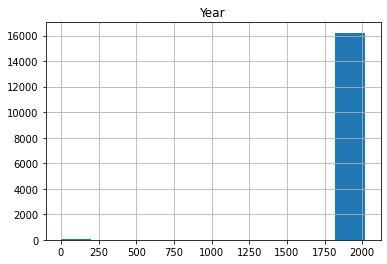

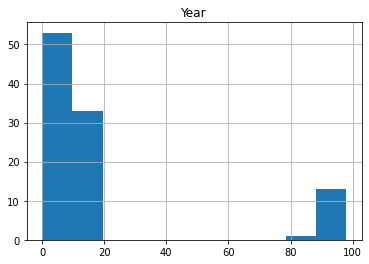

In [64]:
#df['Year'].describe()
df_year_error= df[ (df['Year'].isnull()) | (df['Year'] < 250)]

print( 'year error cnt =',df_year_error.shape[0])
print( 'pop cnt =',df.shape[0])

print( round( df_year_error.shape[0] / df.shape[0] ,2))

# 데이터를 살펴본 결과
# 연도가 Nan or 0인 결측치, 그리고 250 이하의 이상치 데이터가 
# 전체데이터의 0.02%라서 제거하기로 결정했습니다.

# histogram 으로 250이하의 값도 이상치라고 판단. 

df.hist( 'Year')
df_year_error.hist( 'Year')


In [62]:
df[df.duplicated()]
#중복값도 찾았으나 Year이 0이므로 결측치 제거할때 함께 제거.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [63]:

# 데이터 제거.
df1 = df.copy()
del_con_byYear = df_year_error.index
df1.drop(del_con_byYear, inplace=True)


df1['Year'].isnull().sum()


0

In [47]:
#지역에 따라서 선호하는 게임 장르가 다를까?
#선호하는 게임은 많이 팔린 게임이라고 가정.
#지역별 많이 팔린 장르별 내림차순.



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [6]:
#연도별 게임의 트렌드가 있을까 ? 


In [7]:

#출고량이 높은 게임에 대한 분석 및 시각화 프로세스



## 정리
> #지역에 따라서 선호하는 게임 장르가 다를까? 
 - yes

> #연도별 게임의 트렌드가 있을까 ?
 - sure

> #출고량이 높은 게임에 대한 분석 및 시각화 프로세스
 - 작업중.

NameError: name 'kjhjkh' is not defined

### 🔥 FrameWork

'sample'

### 🔥 FrameWork

'sample'

In [ ]:
# 이 곳에 답안을 작성하시기 바랍니다.